# Calculando Módulo de Young em Grafeno

* PET - Física UFRN
* Petiano: José Arthur de Luna Oliveira
* Data: 

## Pré-requisitos

$\quad$ Para o usuário acompanhar os códigos feitos neste Notebook é necessário ter o `LAMMPS` e o `VMD` instalado no computador. Logo abaixo estão listados os links para fazer o download dos programas:

* [LAMMPS](https://docs.lammps.org/Install.html);
* [VMD](https://www.ks.uiuc.edu/Development/Download/download.cgi?PackageName=VMD);
* [Open MPI](https://www.open-mpi.org/software/ompi/v5.0/).

$\quad$ Além disso, recomendo que o leitor já tenha lido o `Notebook` _Deformando Nanotubo De Carbono_ [1], onde já foi explicado como usar algumas ferramentas do `VMD` que precisaremos usar neste trabalho.

## 1. O Módulo de Young

$\quad$ Antes de criarmos o arquivo input, devemos saber o que é o módulo de Young e como determinamos essa propriedade. O módulo de Young é uma das propriedades mecânicas mais importantes para entendermos o comportamento elástico do material. Esta mede a rigidez de um material, em outras palavras, a capacidade do material deformar em uma dimensão e retornar à sua forma original [2, 3].

$\quad$ O módulo de Young é encontrado pela relação da tensão ou stress ($\sigma$) causado no material pela deformação ($\epsilon$) feita, essa como definida abaixo:

$$ E = \frac{\sigma}{\epsilon} \ ,$$

onde $E$ é o módulo de Young. Os outros termos devem ser determinados também, o stress é definido como está descrito abaixo

$$ \sigma = \frac{F}{A} \ ,$$

em que $F$ é a força que está deformando o material e $A$ é a área da seção transversal do material. Já a deformação deve ser determinada da seguinte forma

$$\epsilon = \frac{\Delta L}{L_0} \ ,$$

o qual $\Delta L$ é a variação do comprimento do material (esse comprimento é referente a dimensão que a deformação foi aplicada) e $L_0$ é o tamanho inicial do corpo. Esses dados de deformação e stress o arquivo input usando alguns comandos podemos te-las. 

## 2. Preparativos antes de montar o input

$\quad$ Agora após uma breve explicação sobre o módulo de Young, devemos montar o arquivo input da nossa simulação. De maneira geral, a simulação de Dinâmica Molecular terá que deformar a lâmina de grafeno em uma dimensão. E para aplicar essa deformação, aumentaremos o tamanho da caixa do sistema para deformarmos o grafeno, a caixa deve possuir paredes periódicas. Para fazermos isso, explicaremos primeiramente como funciona a caixa da simulação em Dinâmica Molecular (MD).

## 2.1 Caixa do sistema

$\quad$ Basicamente, a caixa é onde estarão todos os átomos da simulação. No entanto, em MD, em cada lado da caixa, é como se houvesse outra espelhada. Imagine num espaço com vários átomos e dividimos esse espaço em várias caixas, em que cada uma delas possua os mesmos átomos, mesma quantidade para cada átomo, além de que as partículas se moveram da mesma maneira em todas as caixas. De maneira que teremos agora diversos sistemas atômicos, todos iguais [4]. Vale salientar que isso apenas ocorre quando configuramos as paredes da nossa simulação como periódicas. Podemos ver o que foi dito acima, na figura abaixo.

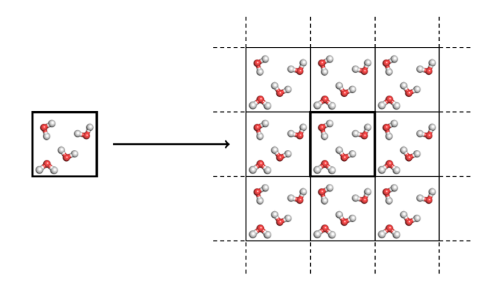

$\quad$ Se a caixa tiver extremidades periódicas, e um átomo sair do sistema pela extremidade direita, outro átomo entra no sistema pela esquerda. Em outras palavras, o nosso sistema não perderá átomos, além disso, átomos de um sistema podem interagir com os dos outros, colidindo, se acoplando, entre outros. E essa interação é importante para a nossa simulação.

$\quad$ Imagine que uma lâmina de grafeno está numa caixa, a qual as suas dimensões no eixo $x$ e $y$ têm quase o mesmo tamanho que os grafeno, de maneira que o grafeno consiga fazer ligações com os outros grafenos dos outros sistemas. Em outras palavras, teremos um grafeno “infinito”, com essa configuração, se alterarmos as dimensões da caixa, também alteraremos a estrutura da mesma forma. Assim, se esticarmos a caixa da simulação no eixo $x$, o grafeno também será esticado nesse eixo.

## 2.2 Gerando a estrutura

$\quad$ Uma das coisas que devem ser feitas antes de montarmos o input é gerar a estrutura para simulação. Para isso, usaremos o programa `VMD`, inicie o programa e, quando isso acontecer, abrirão três janelas: uma do prompt do `VMD`, uma será o display, nessa é possível observar a estrutura gerada, e a outra chamada `VMD main`, nela conseguimos criar, ler e salvar arquivos. 

$\quad$ Na janela `VMD main` siga o seguinte procedimento: vá em `Extensions` $\rightarrow$ `Modeling` $\rightarrow$ `Nanotube Builder`. Feito isso, abrirá uma nova janela do `VMD`, nesta conseguimos gerar a lâmina de grafeno. Para a nossa simulação, criaremos um grafeno com tamanho de $10 \ nm$ no eixo $x$ e $5 \ nm$ no eixo $y$. Após isso, no display, poderá ver a estrutura gerada, como na imagem abaixo.

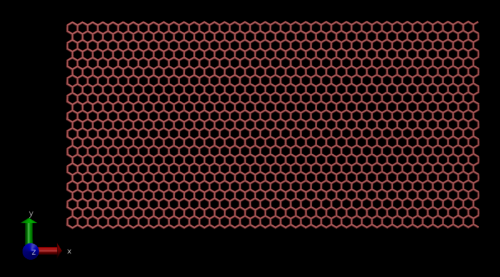

$\quad$ Feito isso, definiremos agora o tamanho da caixa. Com esse objetivo, no programa `VMD` faça o seguinte procedimento: vá `Extensions` $\rightarrow$ `Tk Console`. Em seguida, uma nova janela será aberta, no `Tk Console` é onde definiremos o tamanho da caixa, rodando as seguintes linhas de comando: `pbc box -center com` e depois `pbc set {51.3 101.3 10}`. A primeira linha de comando permite que visualizemos os limites da caixa no display, e a outra defini o tamanho da caixa em cada eixo de coordenada, $x$, $y$ e $z$, respectivamente.

$\quad$ Note que a caixa possui quase as mesmas dimensões da nossa lâmina de grafeno, o valor a mais que foi colocado é para haver distância suficiente dos outros grafenos, a fim que interajam e façam ligações mutuamente, e tenhamos um grafeno “infinito”. Caso a caixa tenha as mesmas dimensões que o grafeno, a interação de repulsão com os outros sistemas será muito forte e o grafeno provavelmente irá explodir, então é necessário haver este espaçamento. Além disso, note que no eixo $z$ colocamos uma distância maior, de forma que o grafeno fique isolado dos sistemas de cima e de baixo. Pomos de forma, pois, caso tivesse distância para ter interação, então estaríamos analisando uma estrutura de grafeno com várias camadas, e neste trabalho estamos interessados em encontrar o módulo de Young do grafeno em monocamada.

$\quad$ Em seguida, feito tudo isso, agora geremos um arquivo da estrutura, para isso vá no prompt do `VMD`, usando o comando `cd` ponha na pasta que queria salvar, e utilizando a seguinte linha de comando `topo writelammpsdata data.grafeno charge`, este será o arquivo que o nosso input lerá para saber as posições dos átomos de carbono do nosso sistema.

## 3. Montando o input

$\quad$ Após todos os preparativos começaremos a montar o arquivo input, este arquivo é necessário para fazer a simulação no `LAMMPS`. Vale apena salientar caso o leitor queira se aprofundar mais consulte as referências [5, 6]. Outra coisa que deve ser ressaltada, dividiremos a montagem do arquivo input em partes, para conseguir explicar os comando de maneira didática, depois de tudo destrinchado juntaremos numa célula de código só para criar o arquivo. Assim, primeiramente definiremos as configurações da simulação, por exemplo, as unidades, os tipos de parede da caixa e entre outros.

In [1]:
#Copie que está logo abaixo no arquivo input.in sem um "#"

#units		real                       
#atom_style	charge                      
#boundary        p p p  

#read_data       data.grafeno            
#pair_style       reaxff NULL
#pair_coeff      * * ffield.reax C
#fix             Reax all qeq/reaxff 1 0.0 10.0 1.0e-6 reaxff 

#neighbor	2.0 bin                     
#neigh_modify	delay 0 every 1 check yes page 500000 one 50000

#variable       tiempo equal step  
    
#fix             7 all balance 2000 1.1 shift z 10 1.1

$\quad$ Nas linhas de comando acima definimos como unidade o `real`, com este comando impõe que as unidades de massa, distância e tempo, por exemplo, sejam de $g/mol$, Angstroms e femtossegundos, respectivamente, e muito mais. Utilizando o comando `atom_style` definimos o tipo de átomo a ser analisado, a linha abaixo define os limites da caixa do sistema como periódica em todas as direções.

$\quad$ Com o comando `read_data` fazemos o input ler o arquivo com as informações das coordenadas dos átomos de carbono. Após essa linha, definimos o potencial de interação entre os átomos, o que utilizaremos será o ReaxFF, não entraremos em muitos detalhes neste trabalho, mas caso o leitor queira aprofundar, aconselhamos consultar no site [5]. O comando `pair_coeff`, que vem logo em seguida, para o programa ter as informações dos coeficientes de força das interações do tipo de átomos que utilizaremos, essas informações estão no arquivo `ffield.reax`.

$\quad$ Para átomos muito distantes, o programa não faz o cálculo dessa interação. O comando `neighbor` define justamente o tamanho dessa distância, no qual põe os átomos dentro desse raio em uma lista. A linha que vem depois tem o comando `neighbor_modify`, este serve para definir de quanto em quanto tempo a lista deve ser refeita, já que os átomos se movem. Depois definimos uma variável _tiempo_ que receberá quanto passo da simulação já rodaram, para sabermos o tempo decorrido da simulação.

$\quad$ Por fim, foi definido um `fix balance`, este comando serve para dividir a caixa em várias partes e dessa forma equilibra a quantidade de átomos em cada núcleo do processador, otimizando a simulação.

$\quad$ A seguir na próxima linhas do input definiremos várias variáveis, e faremos isso por partes.

In [2]:
#Copie que está logo abaixo no arquivo input.in sem um "#"

#variable        velocidade equal 1e-6                            
#variable        timestep_var equal 0.1                           
#variable        temperature equal 10                             
#variable        termalizar_var          equal 200000             
#variable        termalizar_var_npt      equal 200000             
#variable        taxa_termalizar_var     equal 200                

#thermo		${taxa_termalizar_var}                                
#thermo_style    custom step lx ly lz pxx pyy pzz ke pe press temp 

#timestep        ${timestep_var}                                    
#variable        dampingTemp_var  equal  100*${timestep_var}        
#variable        dampingPress_var equal 1000*${timestep_var}

$\quad$ A três primeiras variáveis são da velocidade de puxada da caixa, o passo tempo da simulação e a temperatura do sistema e definimos como $10^{-6} \ Å/fs$, $0.1 \ fs$ e $10 \ K$, respectivamente. As outras três variáveis são quantidade de passos, cada um terão usos diferentes, os dois primeiros serão para termalizar a estrutura. Já a última é para definir de quantos em quantos passos o output deve imprimir as grandezas termodinâmicas, e este já é utilizado para isso com o comando `thermo` logo abaixo. O comando `thermo_style` é justamente para definirmos as grandezas que queremos no output.

$\quad$ Após isso definimos o passo de tempo da simulação com o comando `timestep` recebendo a variável definida acima (_timestep_var_). Em seguida, definimos duas variáveis, a _dampingTemp_var_ e _dampingPress_var_, as recebem valores de cem vez e mil vezes maior que o passo de tempo da nossa simulação, esses são valores recomendados pelo próprio `LAMMPS`.

$\quad$ Agora definiremos algumas variáveis para determinar o stress.

In [3]:
#Copie que está logo abaixo no arquivo input.in sem um "#"

#variable        cfac equal 1.01325e-4                             
#compute         stress all stress/atom NULL    

#variable        stress1 atom  ${cfac}*c_stress[1]                  
#variable        stress2 atom  ${cfac}*c_stress[2]
#variable        stress3 atom  ${cfac}*c_stress[3]
#variable        stress4 atom  ${cfac}*c_stress[4]
#variable        stress5 atom  ${cfac}*c_stress[5]
#variable        stress6 atom  ${cfac}*c_stress[6]

$\quad$ A primeira variável é um fator de conversão de $atm$ para $GPa$, pois usando unidades do tipo `real` a pressão que do sistema está em $atm$. Na segunda linha, mandamos o programa calcular o tensor stress de cada átomo, esse tensor é simétrico com seis componentes e armazenado como um vetor de seis elementos na seguinte ordem: $xx$, $yy$, $zz$, $xy$, $xz$ e $yz$ [5, 6]. Após isso, definimos uma variável que receberá uma componente do tensor stress, mas recebe esse valor convertido em $GPa$.

$\quad$ A seguir definiremos mais variáveis para o stress.

In [4]:
#Copie que está logo abaixo no arquivo input.in sem um "#"

#variable        p1  equal -pxx*${cfac}
#variable        p2  equal -pyy*${cfac}
#variable        p3  equal -pzz*${cfac}
#variable        p12 equal -pxy*${cfac}
#variable        p13 equal -pxz*${cfac}
#variable        p23 equal -pyz*${cfac} 

$\quad$ A primeiras linhas de variáveis, estamos convertendo cada componente do tensor de pressão para $GPa$. Agora colocaremos os comandos de termalização do código.

In [5]:
#Copie que está logo abaixo no arquivo input.in sem um "#"

#fix             99 all box/relax aniso 0.0 dilate partial
#minimize        1.0e-10 1.0e-8 1000 200000
#unfix           99

#velocity        all create ${temperature} 245789 rot yes mom yes          
#restart         2000  restarteq1   restarteq2             
#dump            2 all custom 2000 f_npt.lammpstrj id  type  x y z
#fix             1 all npt temp ${temperature} ${temperature} ${dampingTemp_var} x 0.0 0.0 ${dampingPress_var} y 0.0 0.0 ${dampingPress_var}
#run             ${termalizar_var_npt}
                               
#undump 2                
#unfix 1   

$\quad$ O primeiro comando aplica uma tensão ou um tensor de tensão externa  à caixa de simulação durante a minimização de energia. A segunda linha será para minimizar a energia do sistema, e a que vem logo em seguida desativa a tensão externa que foi aplicada.

$\quad$ Após a minimização, aplicamos o comando `velocity` que gera uma distribuição inicial de velocidade, a velocidade dos átomos é calculada a partir da temperatura, que no nosso sistema é de $10 \ K$. A linha seguinte usamos o comando `restart`, este comando criará dois arquivos para reiniciar a simulação. Em seguida, com o comando `dump` pedindo para o programa criar um arquivo com as informações das posições dos átomos com o passar do tempo. O `fix` logo em seguida define o termostato e o barostato e com o `run` inicia-se a termalização.

$\quad$ A duas últimas linhas de código encerra o arquivo de trajetória de equilibração e desliga o primeiro termostato e barostato. A seguir, faremos a segunda termalização.

In [6]:
#Copie que está logo abaixo no arquivo input.in sem um "#"

#fix             1 all nph y 0.0 0.0 ${dampingPress_var}                                              
#dump            2 all custom 2000 f_npt2.lammpstrj id type  x y z              

#run             ${termalizar_var}                                       
#undump          2         

$\quad$ Como na termalização anterior, essa parte define o barostato e termostato e gera um arquivo com as trajetórias dos átomos. Então, após a termalização poremos os comandos para deformar a caixa e para isso definiremos algumas variáveis.

In [7]:
#Copie que está logo abaixo no arquivo input.in sem um "#"

#variable alx0_Ic equal lx
#variable aly0_Ic equal ly
#variable alz0_Ic equal lz
#variable lx0_Ic equal ${alx0_Ic}
#variable ly0_Ic equal ${aly0_Ic}
#variable lz0_Ic equal ${alz0_Ic}

#variable lxC equal lx
#variable lyC equal ly
#variable lzC equal lz

#variable strain_lxC equal (lx-${lx0_Ic})/${lx0_Ic}
#variable strain_lyC equal (ly-${ly0_Ic})/${ly0_Ic}
#variable strain_lzC equal (lz-${lz0_Ic})/${lz0_Ic}

$\quad$ As seis primeiras variáveis são para armazenar as dimensões iniciais do sistema, as próximas três variáveis serão iguais ao comprimento do sistema nas três direções. Com esses dados conseguiremos determinar a deformação da estrutura nos três eixos, conforme feito em seguida. As variáveis `strain_lxC`, `strain_lyC` e `strain_lzC` é a deformação do sistema nos eixos $x$, $y$ e $z$, respectivamente. 

$\quad$ Agora, finalmente, colocaremos os comandos para deformar a caixa.

In [8]:
#Copie que está logo abaixo no arquivo input.in sem um "#"

#variable run_var equal 0.3/(${timestep_var}*${velocidade})  
#variable taxa_var equal v_run_var/1000

#fix equil1 all print ${taxa_var} "${tiempo} ${strain_lxC} ${strain_lyC} ${strain_lzC} ${p1} ${p2} ${p3} ${p12} ${p13} ${p23} ${lxC} ${lyC} ${lzC} " file data.dat screen no

#dump 2 all custom ${taxa_var} folha.lammpstrj   id  type  x y z 

#fix 2 all deform 1 x erate ${velocidade} remap x     
#restart         2000  restart1   restart2            
#run ${run_var}

$\quad$ Note que depois disso criamos um variável rotulada de `run_var`, essa variável recebe o valor de quantos passos são necessários para deformar o grafeno em $30 \% $. A segunda variável definimos o passo para imprimir as informações que queremos nos outputs. A linha com o `fix` criará um arquivo chamado `data.dat`, onde terá a informação da deformação nas três direções, as componentes do tensor de pressão e o comprimento da caixa periódica nas três direções. A linha com o `dump` criará um arquivo da trajetória dos átomos do esticamento num arquivo chamado `folha.lammpstrj`. E o outro `fix` deformará a caixa, nesse trabalho iremos à folha de grafeno no eixo $x$. E por fim, as duas linhas de comando, a primeira gera arquivos para reiniciar a simulação, criando dois arquivos diferentes da parte de equilibração; e a segunda é para iniciar simulação.

### 3.1 Juntando as peças

$\quad$ Após tudo ter sido feito, agora irmos juntar tudo e criaremos o arquivo input.

In [9]:
%%writefile in.input

#Parâmetros gerais da simulação

units		real                       
atom_style	charge                      
boundary        p p p  

read_data       trib.full            
pair_style       reaxff NULL
pair_coeff      * * ffield.reax C
fix             Reax all qeq/reaxff 1 0.0 10.0 1.0e-6 reaxff 

neighbor	2.0 bin                     
neigh_modify	delay 0 every 1 check yes page 500000 one 50000           

variable       tiempo equal step  
    
fix             7 all balance 2000 1.1 shift z 10 1.1

variable        velocidade equal 1e-6                            
variable        timestep_var equal 0.1                            
variable        temperature equal 10                             
variable        termalizar_var          equal 200000             
variable        termalizar_var_npt      equal 200000             
variable        taxa_termalizar_var     equal 200                

thermo		${taxa_termalizar_var}                                
thermo_style    custom step lx ly lz pxx pyy pzz  ke pe press temp 

timestep        ${timestep_var}                                    
variable        dampingTemp_var  equal  100*${timestep_var}        
variable        dampingPress_var equal 1000*${timestep_var}   

#Cálculo do stress

variable        cfac equal 1.01325e-4                             
compute         stress all stress/atom NULL                        
variable        stress1 atom  ${cfac}*c_stress[1]                  
variable        stress2 atom  ${cfac}*c_stress[2]
variable        stress3 atom  ${cfac}*c_stress[3]
variable        stress4 atom  ${cfac}*c_stress[4]
variable        stress5 atom  ${cfac}*c_stress[5]
variable        stress6 atom  ${cfac}*c_stress[6]

variable        p1  equal -pxx*${cfac}
variable        p2  equal -pyy*${cfac}
variable        p3  equal -pzz*${cfac}
variable        p12 equal -pxy*${cfac}
variable        p13 equal -pxz*${cfac}
variable        p23 equal -pyz*${cfac}

#Primeira termalização

fix             99 all box/relax aniso 0.0 dilate partial
minimize        1.0e-10 1.0e-8 1000 200000
unfix           99

velocity        all create ${temperature} 245789 rot yes mom yes          
restart         2000  restarteq1   restarteq2             
dump            2 all custom 2000 f_npt.lammpstrj id  type  x y z
fix             1 all npt temp ${temperature} ${temperature} ${dampingTemp_var} x 0.0 0.0 ${dampingPress_var} y 0.0 0.0 ${dampingPress_var}
run             ${termalizar_var_npt}
                               
undump 2                
unfix 1                                                                 

#Segunda termalização

fix             1 all nph y 0.0 0.0 ${dampingPress_var}                                              
dump            2 all custom 2000 f_npt2.lammpstrj id type  x y z              

run             ${termalizar_var}                                       
undump          2                                                       

#Cálculo da deformação

variable alx0_Ic equal lx
variable aly0_Ic equal ly
variable alz0_Ic equal lz
variable lx0_Ic equal ${alx0_Ic}
variable ly0_Ic equal ${aly0_Ic}
variable lz0_Ic equal ${alz0_Ic}

variable lxC equal lx
variable lyC equal ly
variable lzC equal lz

variable strain_lxC equal (lx-${lx0_Ic})/${lx0_Ic}
variable strain_lyC equal (ly-${ly0_Ic})/${ly0_Ic}
variable strain_lzC equal (lz-${lz0_Ic})/${lz0_Ic}

#Deformando a caixa

variable run_var equal 0.3/(${timestep_var}*${velocidade})  
variable taxa_var equal v_run_var/1000                      # Define o intervalo para imprimir os outputs do puxamento
 
fix equil1 all print ${taxa_var} "${tiempo} ${strain_lxC} ${strain_lyC} ${strain_lzC} ${p1} ${p2} ${p3} ${p12} ${p13} ${p23} ${lxC} ${lyC} ${lzC} " file data.dat screen no

dump 2 all custom ${taxa_var} folha.lammpstrj   id  type  x y z 

fix 2 all deform 1 x erate ${velocidade} remap x     
restart         2000  restart1   restart2            
run ${run_var}

Overwriting in.input


### 3.2 Rodando o input

$\quad$ Rodaremos finalmente a simulação, para isso pode ser feita em Python, mas os comandos a serem usados são do prompt de comando. A linha de código abaixo põe o input para rodar.

In [10]:
#!lmp -in in.input

$\quad$ Caso queira rodar diretamente no prompt, não é necessário pôr “!”. No entanto, essa simulação tem muito passos e usar o comando acima provavelmente demorará dias para terminar de rodar, para resolver esse problema, usaremos mais núcleos do processador. Com a linha de comando acima estamos rodando a simulação em apenas um núcleo, utilizando o programa `Open MPI` conseguimos fazer a simulações utilizando mais núcleos.

$\quad$ Com esse programa instalado, escolha de quantos núcleos serão utilizados ficará a cargo do usuário. Nesse trabalho utilizamos a simulação no Núcleo de Processamento de Alto Desempenho da UFRN (NPAD/UFRN), então utilizamos 64 núcleos da partição amd-512. Assim, utilizamos a seguinte linha de comando.

In [11]:
#!mpiexec -n 128 lmp -in in.input

$\quad$ 

## Agradecimentos

$\quad$ Os resultados desse `Notebook` só foram possível graças ao Núcleo de Processamento de Alto Desempenho da UFRN (NPAD/UFRN). 

## Referências

**[1]** OLIVEIRA, J. A. de L. Deformando Nanotubo De Carbono. GitHub. PET - Física, 2023. Disponível em: <https://github.com/PETfisicaUFRN/PET.py/blob/main/Notebooks/Deformando%20nanotubo%20de%20carbono.ipynb>. Acesso em: 29/jun./24.

**[2]** COSTA, M. Da. Módulo De Elasticidade Ou Módulo De Young. Biopdi. 2023. Disponível em: <https://biopdi.com.br/artigos/modulo-de-elasticidade-ou-modulo-de-young/>. Acesso em: jun./29DC.

**[3]** DARAEE, M.; HASSANI, S.; AZAR, S. An Overview of Determination of Young’s modulus by AFM in Various Fields. [s.l.]: [s.n.], [s.d.]. Acesso em: 29/jun./24.

**[4]** RAPAPORT, D. C. The Art of Molecular Dynamics Simulation. [s.l.]: Cambridge University Press, 2004.

**[5]** LAMMPS Documentation (27 Jun 2024 version) — LAMMPS documentation. docs.lammps.org. 2024. Disponível em: <https://docs.lammps.org>. Acesso em: 02/jul./24.

**[6]** THOMPSON, A. et al. LAMMPS - a Flexible Simulation Tool for particle-based Materials Modeling at the atomic, meso, and Continuum Scales. Computer Physics Communications, [s.l.], 2022. DOI: https://doi.org/10.1016/j.cpc.2021.108171.